In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, f1_score, precision_score, confusion_matrix

In [16]:
# 2 nums input
# 1 op

def add(a,b):
    return a + b
def sub(a,b):
    return a - b 
def mul(a,b):
    return a * b
def div(a,b):
    if b>0:
        return a/b
    else:
        print("cannot be divided by zero")
        
        
        

num1 = int(input("Enter first number: "))
num2 = int(input("Enter second number: "))
op = input("Enter the symbol of operator: +, -, *, /")

match op:
    case '+': 
        print(add(num1,num2))
    case '+':
        print(sub(num1,num2))
    case '*':
        print(mul(num1,num2))
    case '/':
        print(div(num1,num2))
    case '_':
        print("Invalid input")    
            
        
    
    

3


In [26]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: ylabel='Density'>

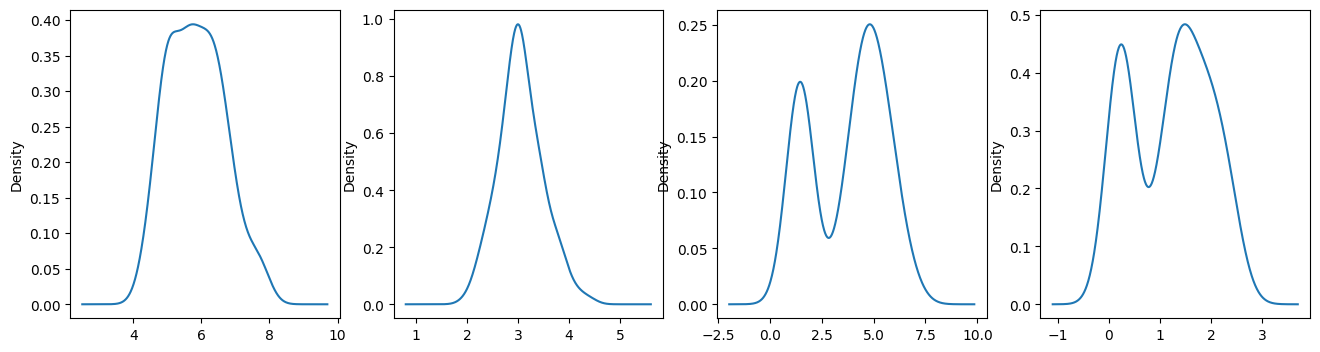

In [42]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))

data['sepal_length'].plot(kind='kde',ax=ax1)
data['sepal_width'].plot(kind='kde',ax=ax2)
data['petal_length'].plot(kind='kde',ax=ax3)
data['petal_width'].plot(kind='kde',ax=ax4)

In [43]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [49]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

0.0


d:\Ao\Code\dsc\Sem-6\01-machine-learning\05-Mid-Lab\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Ao\Code\dsc\Sem-6\01-machine-learning\05-Mid-Lab\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Ao\Code\dsc\Sem-6\01-machine-learning\05-Mid-Lab\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

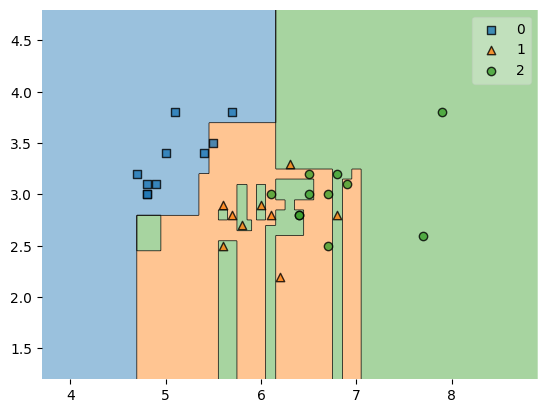

In [85]:
# Overfitting on less features
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

X = data[['sepal_length','sepal_width']]
y = data[['species']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train_encoded)
y_pred = dt.predict(X_test)

print(f"{accuracy_score(y_test, y_pred)}")
# Plotting the decision regions with encoded labels
plot_decision_regions(X_test.values, y_test_encoded, clf=dt)

In [67]:
type(y_pred)

numpy.ndarray

In [65]:
y_test.shape, y_pred.shape

((30, 1), (30,))